In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/content/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


**Data Cleaning:**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
print("\033[1mMissing values:\033[0m")
print(df.isnull().sum())

Missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [6]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                                 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)

In [7]:
# Verify changes
print("\033[1mDataFrame after cleaning:\033[0m")
df.head()

DataFrame after cleaning:


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


**Feature Selection:**

In [8]:
df.corr()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,0.296898,0.255517,0.187057,0.093073,0.452954,0.329777,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425,-0.003648,-0.082972
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627,0.041327,-0.165705
mainroad_yes,0.296898,0.288874,-0.012033,0.042398,0.121706,0.204433,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876,0.011450,-0.133123
guestroom_yes,0.255517,0.140297,0.080549,0.126469,0.043538,0.037466,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897,0.005821,-0.099023
basement_yes,0.187057,0.047417,0.097312,0.102106,-0.172394,0.051497,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,0.050284,-0.117935
hotwaterheating_yes,0.093073,-0.009229,0.046049,0.067159,0.018847,0.067864,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.059411,0.063819,-0.059194


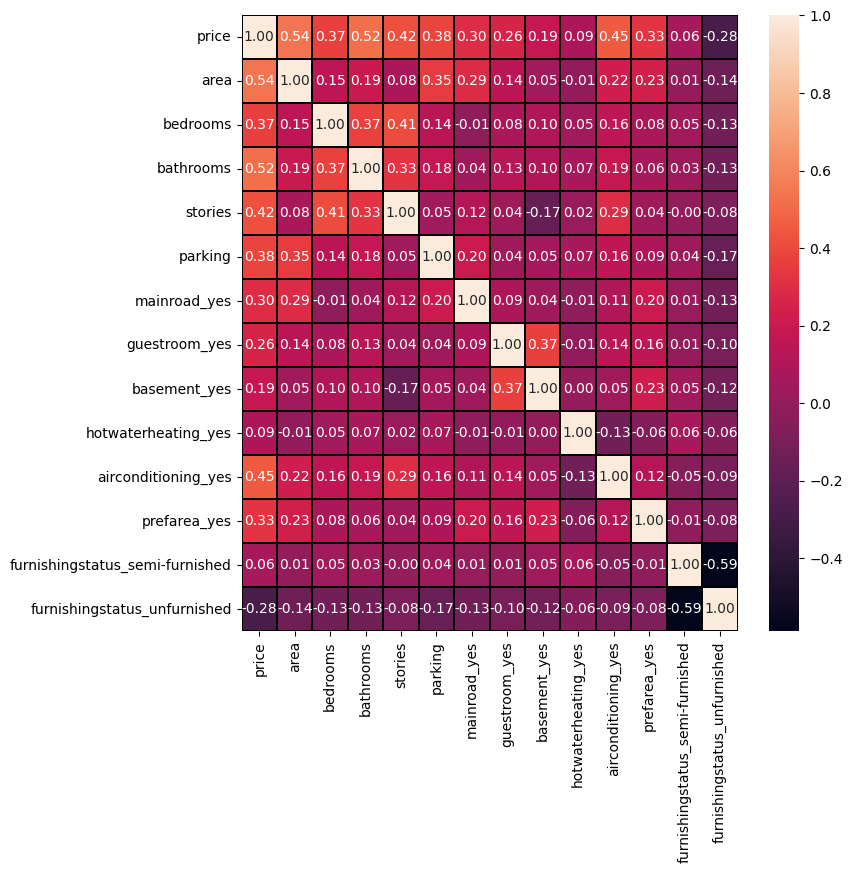

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, annot=True, linewidths=0.2, linecolor="black", fmt=".2f", ax=ax)

plt.show()

In [10]:
# Find features with correlation greater than a threshold with the target variable
threshold = 0.5
high_corr_features = corr.index[abs(corr['price']) > threshold].tolist()

# Print selected features
print("\033[1mFeatures with high correlation with the target variable:\033[0m")
print(high_corr_features)

Features with high correlation with the target variable:
['price', 'area', 'bathrooms']


In [11]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming X contains the features and y contains the target variable (price)
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable

# Initialize a linear regression model
model = LinearRegression()

# Initialize RFE
rfe = RFE(model, n_features_to_select=3)
# Fit RFE
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
# Print selected features
print("\033[1mSelected features using RFE:\033[0m")
print(selected_features)

Selected features using RFE:
Index(['bathrooms', 'mainroad_yes', 'airconditioning_yes'], dtype='object')


In [12]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Assuming X contains the features and y contains the target variable (price)
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Lasso regression model
lasso = Lasso(alpha=0.1)

# Fit Lasso model
lasso.fit(X_scaled, y)

# Get coefficients and select non-zero coefficient features
selected_features = X.columns[lasso.coef_ != 0]

# Print selected features
print("\033[1mSelected features using Lasso regularization:\033[0m")
print(selected_features)

Selected features using Lasso regularization:
Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes',
       'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')


**Model Training:**

In [13]:
from sklearn.linear_model import LinearRegression

# Assuming X contains the selected features and y contains the target variable (price)
X = df[selected_features]  # Selected features
y = df['price']  # Target variable

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

**Model Evaluation:**

In [14]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming X_test contains the selected features and y_test contains the actual target variable values for the test set
X_test = df[selected_features]  # Selected features from the test set
y_test = df['price']  # Actual target variable values for the test set

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("\033[1mMean Squared Error (MSE):\033[0m", mse)
print("\033[1mR-squared:\033[0m", r_squared)
print("\033[1mMean Absolute Error (MAE):\033[0m", mae)

Mean Squared Error (MSE): 1111187722284.4001
R-squared: 0.6818018485540142
Mean Absolute Error (MAE): 775054.3287400283


**Visualization:**

<Figure size 600x400 with 0 Axes>

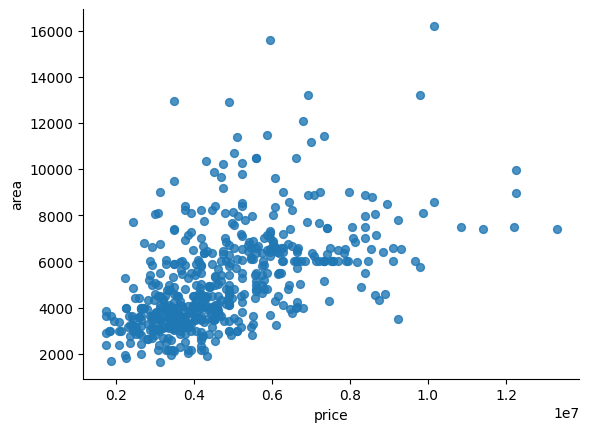

In [15]:
# price vs area
plt.figure(figsize=(6, 4))
df.plot(kind='scatter', x='price', y='area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

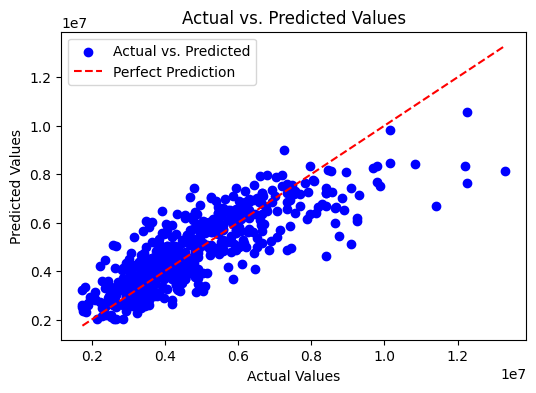

In [16]:
# Plotting the predicted vs. actual values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

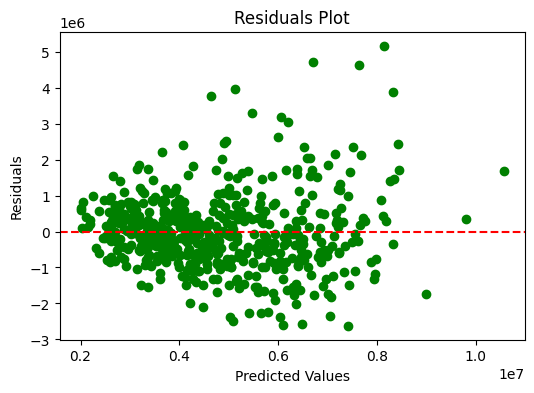

In [17]:
# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, color='green')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()